<a href="https://colab.research.google.com/github/subodhkanoujiya4/Classification_with_Logistic_Regression/blob/main/Classification_with_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Upload


In [7]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (1).csv


Import Libraries and Load Dataset

In [8]:
# === Import Libraries ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# === Load Dataset ===
df = pd.read_csv("data.csv")

# === Preprocessing ===
df.drop(columns=["id", "Unnamed: 32"], inplace=True)
df["diagnosis"] = df["diagnosis"].map({'M': 1, 'B': 0})

# Features and Target
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

# Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# === Train Logistic Regression Model ===
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# === Predictions & Probabilities ===
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]

Evaluation the Confusion Matrix and Classification report.


In [9]:
# === Evaluation ===
conf_matrix = confusion_matrix(y_test, y_pred)
print("🔹 Confusion Matrix:")
print(conf_matrix)

print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print("🔹 ROC-AUC Score:", round(roc_auc, 3))


🔹 Confusion Matrix:
[[70  1]
 [ 2 41]]

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

🔹 ROC-AUC Score: 0.997


ROC Curve and ROC Curve Plot.


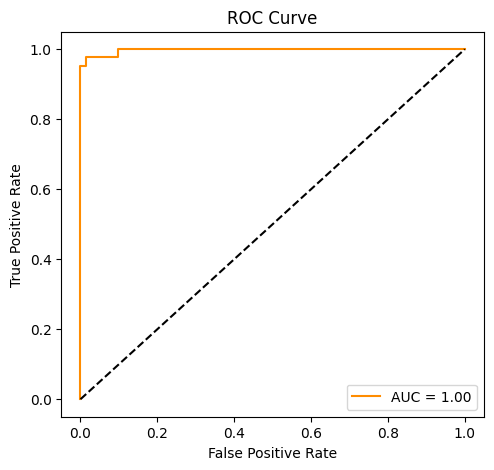

In [10]:
# === ROC Curve ===
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(12, 5))

# --- ROC Curve Plot ---
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()


Sigmoid Function Plot.

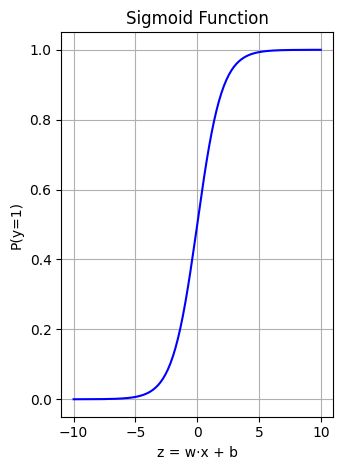

In [11]:
# --- Sigmoid Function Plot ---
plt.subplot(1, 2, 2)
z = np.linspace(-10, 10, 200)
sigmoid = 1 / (1 + np.exp(-z))
plt.plot(z, sigmoid, color='blue')
plt.title("Sigmoid Function")
plt.xlabel("z = w·x + b")
plt.ylabel("P(y=1)")
plt.grid(True)

plt.tight_layout()
plt.show()


Threshold Tuning and Adjust as your need.

In [12]:
# === Threshold Tuning Example ===
threshold = 0.4  # Adjust as needed
y_custom_threshold = (y_proba >= threshold).astype(int)

print(f"\n🔧 Custom Threshold = {threshold}")
print(confusion_matrix(y_test, y_custom_threshold))
print(classification_report(y_test, y_custom_threshold))



🔧 Custom Threshold = 0.4
[[70  1]
 [ 1 42]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

